# Chapter 5. Machine Learning

In many ways, machine learning is the primary means by which data science manifests itself to the broader world. Machine learning is where these computational and algorithmic skills of data science meet the statistical thinking of data science, and the result is a collection of approaches to inference and data exploration.

This notebook will dive into practical aspects of machine learning, primarily using python's scikit-learn package.

## What is machine-learning?

Machine learning has risen form the field of artificial intelligence but is more focused on building mathematical models to help understand data. "Learning" enters the fray when we give these models *tunable parameters* that can be adapted to observed data. 

When these models have been fit to previously seen data, they can be used to predictand understand aspects of newly observed data.

### Categories of machine learning

At the most fundemental level, machine learning can be categorized into two main types: 
- **supervised learning** involves somehow modeling the relationship between measured features of data and some label associated with the data. Once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into **classification** tasks and **regression** tass. 

- **unsupervised learning** involves modeling the features of a datasat without reference to any label, and is often described as "letting the data speak for itself.

## Introducing Scikit-learn
There are several Python libraries that provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of commong algorithms. Scikit-Learn is carachterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefint of this uniforminty is that once you understand the basic use and syntax of Scikit-earn for one type of model, switching to a new model or algorithms is very straightforward.

### Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer. The best way to think about data withing scikit-learn is in terms of tables of data.

#### Data as table

A abasic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. For example, consider the *iris dataset*, famously analyzed by Ronald Fisher in 1936. We can download this dataset in the form of a Pandas DataFrame using the seaborn library

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

Here each row of data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. 

#### Features matrix

The table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will cal the **features matrix**. By convention, this features matrix is often stored in a variable named $X$.

#### Target array
In addition to the features matrix $X$, we also generally work with a *label* or *target* array, which by convention we will usually call $y$ The target is usually one dimensional, with length $\text{n_samples}$ and is generally contained in a numpy array or pandas series.

To visualize, let's label the iris data according to our target array, the species column in the data, and plot how the different species are distributed.

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(iris, hue='species', size=2)

For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame, which we can do using some of the Pandas *DataFrame* operations

In [ ]:
# Extract features matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

In [ ]:
# Extract target array
y_iris = iris['species']
y_iris.shape

## Scikit-Learn's estimator API

The Scikit-Learn API is designed with the followingguiding principles in mind, as outlined in the [Scikit-Lear API paper](https://arxiv.org/abs/1309.0238):

- Consistency
    --
    All objects share a common interface drawn from a limited set of methods, with consistent documentation.
- Inspection
    --
    All specific parameter values are exposed as public attributes
- Limited object hierarchy
    --
    Only algorithms are represented by Python classes; datasets are represented in standard formats 
    and parameter names use standard python strings
- Composition
    --
    Many machine learning tasks can be expressed as sequences of more fundemental algorithms, and scikit-learn makes use
    of this wherever possible
- Sensible defaults
    --
    When models require user-specific parameters, the library defines an appropriate default value.


#### Basic of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-learn
2. Choos model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the *fit()* method of the model instance.
5. Apply the model to new data.

#### Supervised learning example: Simple Linear Regression
As an example of this process, let's consider a simple linear regression - that is, the common case of fitting a line to $(x,y)$ data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

1. Choos a class of model.

In Scikit-Learn, every class of model is represented by a Python class. So for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [ ]:
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters

An important point is that a class of model is note the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

* Would we like to fit for the offset?
* Would we like the model to be normalized?
* Would we like to preprocess our features to add model flexibility?
* What degree of regularization would we like to use in our model?
* How many model component would we like to use?

These choices are often called *hyperparameters*, or parameters that must be set before the model is fit to data.

In [ ]:
model = LinearRegression(fit_intercept=True)
model

3. Arrange data into a features matrix and target vector.

In [ ]:
X = x[:, np.newaxis]
X.shape

4. Fit the model to your data.

Now it's time to apply our model to the data. This can be done with the fit() method:

In [ ]:
model.fit(X, y)

This *fit()* command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributed that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the *fit()* process have trailing underscores; for example, in this linear model, we have the following.

In [ ]:
model.coef_

In [ ]:
model.intercept_

One question that frequently comes up regard the uncertainty in such intenal model parameters. In general, ScikitLearn does not provide tools to draw conclusions from internal model parameters themselves: Interpreting model parameters is much more a statistical modeling question than a machine learning question. 

5. Predict labels for unknown data.

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, we can do this using the *predict()* method.

In [ ]:
xfit = np.linspace(-1, 11)

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data and then this model fit

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

#### Supervised learning example: Iris classification

Let's take a look at another exampleof this process, using the iris dataset we discussed earlier. Our question will be this:

given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Baes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Gaussian naive Bayes is often a good model ti use as a baseline classification, before you explore wether improvements can be found through more sophisticated models.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [ ]:
# 1. Choose model class
from sklearn.naive_bayes import GaussianNB
# 2. Instantiate model
model = GaussianNB()
# 3. Fit model to data
model.fit(Xtrain, ytrain)
# 4. Predict on new data
y_model = model.predict(Xtest)

Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

#### Unsupervised learning example: Iris Dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional:

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data; after all, it is much easier to plot data in two dimensions that in four dimensions or higher.

In [ ]:
# 1. Choose the model class
from sklearn.decomposition import PCA
# 2. Instantiate the model with hyperparameters
model = PCA(n_components=2)
# 3. Fit to data. Notice y is not specified!
model.fit(X_iris)
# 4. Transform the data to two dimensions
X_2D = model.transform(X_iris)

Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's lmplot.

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

#### Unsupervised learning: iris clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM).

In [ ]:
# 1. Choose the model
from sklearn.mixture import GaussianMixture as GMM
# 2. Instantiate the model w/hyperparameters
model = GMM(n_components=3, covariance_type='full')
# 3. Fit to data. Notive that y is not specified!
model.fit(X_iris)
# 4. Determine cluster labels
y_gmm = model.predict(X_iris) 

As before, we will add the cluster label to the Iris *DataFrame* and use Seaborn to plot the result.

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

## Application: Exploring handwritten digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of handwritten digits. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shorcut and use Sciki-Learn's set of preformatted digits, which is built into the library.

### Loading and visualizing the digits data

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

The images data is a three-dimensional array: 1797 samples, each consisting of an 8 x 8 grid of pixels. Let's visualize the first hundreds of these

In [ ]:
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In order to work with this data in Scikit-learn we need a two dimensional representation of it.

We can accomplish this by treating each pixel in the image as a feature - that is, by flattening out the pixel arrays.

In [ ]:
# Features matrix
X = digits.data
# Target array
y = digits.target

#### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64 dimensional parameter space.

For this we will use of a unsupervised [manifold learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction) algorithm called [Isomap](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Isomap).

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

We see that the projected data is now two-dimensional. Let's plot this data to see if we can learn anything from it's structure.

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

This plot gives some good intuition into how well various numbers are seperated in the larger 64-dimensional space. For examples zeros (in dark red) and ones (in red) have very little overlap in parameter space. 

Intuitively this makes sence, a zero is empty in the middle of the image, while a one will generally have ink in the middle. On the other hand, there seems to be a more or less continous spectrum between ones and fours. We can understand this by realizing that some people drawones with "hats" on them, which cause them to look similar to fours.

#### Classification on digits.

Let's apply a classification algorithm to the digits. As with the Iris data previously, we will splot the data into training and testing sets and fit a gaussian naive bayes model.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparin the true values of the test set to the predictions:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

With an extremely simple model, we find that about 80% accuracy for classification of the digits! Let's see where our model struggles by plotting a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

This shows us where the mislabeled points tend to be. A large number of twos here are misclassified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again with their predicted labels.

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## Hyperparameters and Model Validation

In the previous section, we saw the basic recipe for applying a supervised machine learning model:

1. Choose a class of model
2. Choose model Hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

The first two pieces of this - the choice of model and choice of hyperparameters - are perhaps the most important part of using these thools and techniques effectively. In order to make an informed choice, we need a way to *validate* that our model and our hyperparameters are a good fit to the data. While this may sound simple, there are some pitfalls that you must void to do this effectively.

### Thinking About Model Validation

In principle, model validaton is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparin the prediction to the known value. The following sections first show a naive approach to model validation and why it fails, before exploring the use of houldout sets and cross-validation for more robust model evalaluation.

#### Model validation the wrong way

Let's demonstrate the naive approach to validation using the Iris data, which we saw in the previous section. We will start by loading the data:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Next we choose a model and hyperparameters. Here we'll use a k-neighbors classifier with $\text{n_neigbors}=1$. This very simple and intuitive model says that "the label of an unknown point is the same as the label of the closest training point"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Then we train the model, and use it to predict labels for data we already know:

In [ ]:
model.fit(X, y)
y_model = model.predict(X)
accuracy_score(y, y_model)

We see an accuracy of $1.0$. This is due to the fact that we train and evaluate the model on the same data. 

#### Model validation the right way: Holdout sets

We introduce *holdout sets* to set aside some data for the model to be evaluated on. 

In [ ]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

#### Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that wehave lost a portion of our data to the model training. One way to address this is to use cross-validation - that is, to do a sequence of fits where each subset of the data is used both as a training set and validation set.

Doing this $n$ times, we have a $\text{n-fold}$ cross-validation. This can be implemented in sklearn like so

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

We can do this in the extreme case where we leave only one point out for validation. This is known as leave-one-out cross-validation, and can be used as follows:

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

In [ ]:
scores.mean()

### Selecting the Best Model

Now that we've seen the basics of validation and cross-validation, we will go into a little more depth regarding model selection and selection of hyperparameters. 

Of core importance is the following question: *if our estimator is underperforming, how should we move forward?*

* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample.

The answer to this question is often counterintuitive. In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results. 

#### The bias-variance trade-off

Fundementally, the question of "the best model" is about finding a sweet spot in the trade-off between *bias* and *variance*.

Generally:

* For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
* For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

#### Validation curves in Scikit-learn

In general:

* Training curve is everywhere higher than validation. The model will be better fit to data it has seen than to data it has not seen.
* For very low model compexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data. 
* For very high model complexity (a high-vraiance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.
* For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

Let's look at an example of using cross-validation to compute the validation curve for a class of models. Here we will use a *polynomial regression* model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter. For example, a degree-1 polynomial fits a straight line to the data

$$
y = ax + b
$$

A degree 3 polynomial:

$$
y = ax^3 + bx^2 + cx + d
$$

N degree:

$$
y = c_n x^n + c_{n-1} x^{n-1} + \dots + c_1 x + c_0
$$

In python:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

Now let's create some data to which we will fit our model:

In [ ]:
import numpy as np 

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

Now let's visualize the data

In [ ]:
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

Now let's plot the validation curve

In [ ]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color = 'blue',
    label = 'training score')

plt.plot(degree, np.median(val_score, 1), color='red',
    label = 'validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

This show precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score, the training score is monotonically improving with increased model complexity, and thevalidation score reaches a maximum before dropping off as the model becomes overfit.

From the validation curve, we can read of that the optimal trade-off between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

## Learning Curves

One important aspects of model complexity is that the optimal model will generally depend on the size of your training data. For example, let's generate a new dataset with a factor of five or more points.

In [ ]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

We will duplicate the preceding code to plot the validation curve for this larger dataset; for reference let's over-plot the previous results as well

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
    'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a 20 degree model is not seriously overfitted.

Thus we see that the behaviour of the validation curve has no one, but two, important inputs: the model complexity and the number of training points.

The general behavior we would expect from a learning curve is this:

* A model of a given complexity will *overfitÆ a small dataset: this means the training score will be relatively low.
* A model of a given complexity will *underfit* a large dataset: this means that the training score will decrease, but the validation score will increase.
* A model will never, except by change, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

#### Learning curves in Scikit-Learn

Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth order polynomial.

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

Plotting a learning curve for your particular choice of model and dataset can help you to make this type of decision about how to move forward in improving your analysis.

### Validation in practice: Grid Search

The preceding discussion is meant to give some intuition into the trade-off between bias and variance, and its dependence on model complexity and training set size. In practice, models have generally more than one know to tur, and thus plots of validation and learning curves change from lines to multidimensional surfaces. These visualizations are difficult and in practice we simply want to find the model that maximizes the validation score.

Scikit learn provides automated tools for this in the *grid_search* module.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
grid.fit(X, y)
grid.best_params_

## Feature engineering

The previous sections outline the fundemental ideas of machine learning, but all of the examples assume that you have numerical data in a tidy format. In the real world, data rarely comes in such a form. With this in mind, one of the more important steps in using machine learning in practuce is *feature engineering* - that is taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

### Categorical Features

One common type of non-numerical data is categorical data. Your data may look something like this:

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

One might be tempted to encode the data with straight forward numerical mappings. But this is generally not a useful approach in Scikit. The models assume that numerical features reflect algebraic quantities. This would for example imply:

$$
\text{Queen Anne} < \text{Fremont} < \text{Wallingford}
$$

Which is nonsense. 

In this case, one proven technique is to use *one-hot encoding*, which effectively creates extra columns indicating the presence or absence of a category.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

The neighborhood column has been expanded into three seperate columns, representing the three neighborhood labels, and that each row has a 1 in the coumn associated with its neighborhood.

To see the meaning of each column, you can inspect the feature names:

In [ ]:
vec.get_feature_names()

In [ ]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

### Text Features

Another common need in feature engineering is to convert text top a set of representative numerical values. Fore example, most automatic mining of social media data relies on some form of encoding the text as numbers. One of the simplest methods of encoding data is by *word counts*: You take each snippet of text, count the occurrences of each word within it, and put the results in a table.

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

For a vectorization of this data based on word count, we could construct a column representing the word "problem", the word "evil" and so on.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

In [ ]:
import pandas as pd 
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

The problem of using raw word count is that words that are very common (a, the, of, and) will get too much weight. Therefore we use TFIDF. Which stands for term-frequency and inverse document frequency. Which is calculated like this:

Given a set of documents $$D = {d_0, d_1, \dots, d_n}$$

And a term $t$, we calculate the term frequency in a single document like so

$$
\text{tf}(t, d) = \frac{f_{t, d}}{\text{No of words in } d}
$$

And to remove the bias very common words we use the inverse document frequency for a given term $t$ and a set of documents $D$

$$
\text{idf}(t, D) = \log \frac{N}{|\{ d \in D : t \in d\}|}
$$

Which if a term appears in every document we get $\log \frac{1}{1} = 0$ and it does not get weighted. tfidt therefore becomes

$$
\text{tfidf}(t, d, D) = \text{tf}(t, d) \cdot \text{idf}(t, D)
$$

The calculations above can easily be implemented in python usink sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

### Image Features

Another common need is to suitably encode *images* for machine learning analysis. The simples approach is what we used for the digits data.
This is a large field of it's own and needs it's own chapter.

### Derived Features

Another useful type of feature is one that is mathematically derived from some input features. We saw an example of this when we constructed *polynomial features* from our input data. We saw that we could convert a linear regression into a polynomial regression not by changing the model but by transforming the input! This is sometimes known as basis function regression.

For example, this data cannot be well described by a straight line.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

Still, we can fit a line to the data using LinearRegression and get the optimal result:

In [ ]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

it's clear that we need a more sophisticated model to describe the relationship between $x$ and $y$. Let's add polynomial features:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

the derived feature matrix has one column representing $x$ and a second column representing $x^2$ and a third, $x^3$

In [ ]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

### Imputation of Missing Data

Another common need in feature engineering is handling missing data. We may for example have a dataset like this:

In [ ]:
from numpy import nan
X = np.array([[nan, 0, 3],
              [3, 7, 9],
              [3, 5, 2],
              [4, nan, 6],
              [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

When applying typical machine learning model to such data, we will need to first replace such missing data with appropriate fill value. This is known as *Imputation* of missing values. 

One baseline imputation approach is replacing nans with the mean, median or most frequent value.

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

This data can be fed directly into, for example, a linear regression model.

In [ ]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

### Feature pipelines

With any of the preceding examples, it can quickly become tedious to do the transformations by hand. To streamline the preprocessing pipeline, scikit-learn provides a pipeline object, which can be used as follows:

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

This pipeline object will work and act like any standard scikit-learn object, and will apply the specified steps to any input data.

In [ ]:
model.fit(X, y)
print(y)
print(model.predict(X))

## In Depth: Decision Trees and Random Forests

Random Forests are an ensemble method, a method that relies on aggregating the results of an ensemble of simpler estimators. The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts; that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting!

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### Motivating Random Forests: Decision Trees

Random forests are an example of an ensemble learner built on decision trees. For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. The binary splitting makes this extremely efficient: in a well constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of cases.

#### Creating a decision tree

Consider the following two-dimensional data, which has oneof four class labels

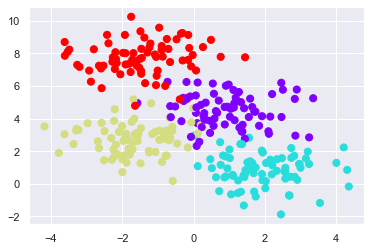

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

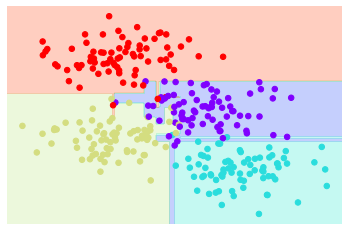

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)

#### Decision trees and overfitting

Look at the interactive plot below, notice that as depth increases, we tend to get very strangely shaped classifications. It is clearly overfitted. Such overfitting turns out to be a general property of decision trees; it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

One way to see this is to fit the model on different subsets of the data. 

In [13]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

### Ensembles of Estimators: Random Forests

This notion, that multiple overfitting estimators can be combined to reduce the effect of this overfitting is what underlies an ensemble method called *bagging*. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

We can do this type of bagging classifications manually using scikit-learn's *BaggingClassifier* meta-estimator as shown here

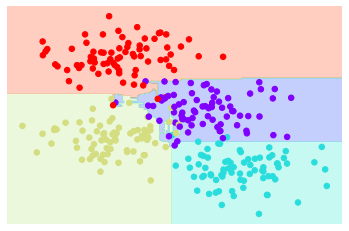

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized when some stochasticity is injected in how the splits are chosen. 

In scikit-learn, such an optimized ensemble of randomized decision trees is implemented in the *RandomForestClassifier* estimator, which takes care of all the randomization automatically.

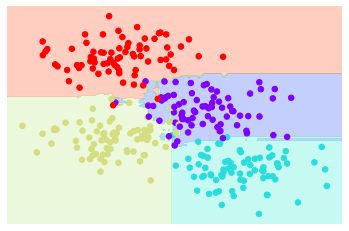

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

## Random Forest Regression

Random forests can also be made to work in the case of regression. The estimator to use for this is the RandomForestRegressor, and the syntax is very similar to what we saw earlier.

Consider the following data, drawn from the combination of a fast and slow oscillation

<ErrorbarContainer object of 3 artists>

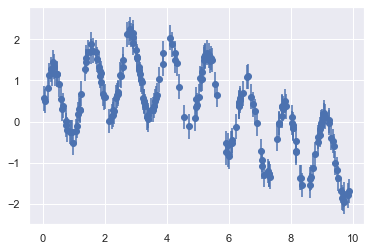

In [20]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.rand(len(x))

    return (slow_oscillation + fast_oscillation + noise)

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

Using random forest regressor, we can find the best fit curve as follows

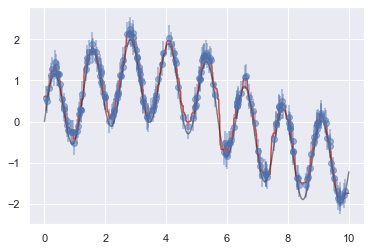

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

## Example: Random Forest for Classifying Digits

Let's see how random forest can be used to classify digits.

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

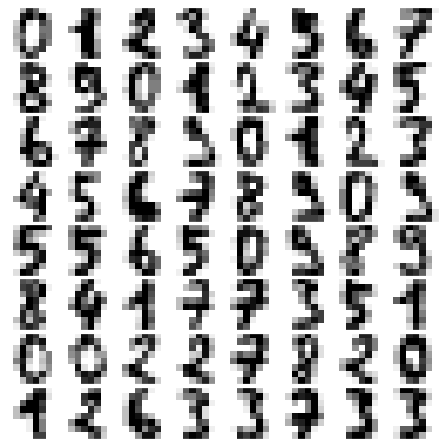

In [27]:
# Set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                     hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text=(0, 7, str(digits.target[i]))

In [30]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data,
                                                digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [31]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'predicted label')

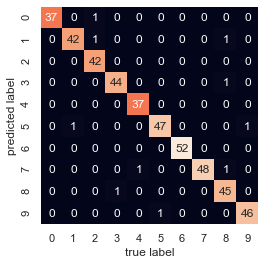

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Summary of Random Forests

Random forests are a powerful method with several advantages:

* Both training and prediction are very fast, because of the simplicity of the underlying decision trees. 
* The multiple trees allows for a probabilistic classification: a majority vote among estimators gives an estimate of the probability.
* The nonparametric model is extremely flexible, and can thus perform well on tasks that are underfit by other estimators.